In [ ]:
%load_ext autoreload
%autoreload 2

import util.graph as gu
import polars as pl
from pathlib import Path

In [2]:
# assumes that the dataset(s) have been pre-converted to parquet from JSON
def load_dataset(root: Path, split: str) -> pl.DataFrame:
    path = root / f"{split}-*.parquet"
    lf = pl.scan_parquet(str(path))
    return lf.collect()

def make_combined(train: pl.DataFrame, test: pl.DataFrame) -> pl.DataFrame:
    train2 = train.with_columns(pl.lit("train").alias("split"))
    test2  = test.with_columns(pl.lit("test").alias("split"))
    return pl.concat([train2, test2], how="vertical_relaxed")

ROOT = Path("/mnt/data/tdalton/phreshphish-v1.0.1/dataset")
train = load_dataset(ROOT, split="train")
test = load_dataset(ROOT, split="test")

In [3]:
combined = make_combined(train, test)

In [4]:
combined

sha256,url,label,target,date,lang,lang_score,html,text,title,split
str,str,str,str,date,str,f32,str,str,str,str
"""7051b32669f5e96540d19f952f9252…","""https://www.timeline.co/portfo…","""benign""",null,2024-08-01,"""en""",0.922838,"""<html lang=""en""><head><style>.…","""Investment Portfolio Managemen…","""investment portfolio managemen…","""train"""
"""02301551a9de955099e21b5ecd217f…","""https://metamaesklouggine.gitb…","""phish""","""other""",2024-07-20,"""en""",0.883524,"""<html class=""scroll-pt-[76px] …","""MetaMask Login - Simplify Dec…","""metamask login - simplify dec…","""train"""
"""798bc443f418a69f1bee5c2594dc14…","""https://savoringthepast.net/20…","""benign""",null,2024-09-14,"""en""",0.952108,"""<html lang=""en""><head><script …","""Preparing Salt Pork | Savoring…","""preparing salt pork | savoring…","""train"""
"""47d15cb70cd9360883c84b9a5268d6…","""https://screenrant.com/pulp-fi…","""benign""",null,2024-09-10,"""en""",0.930877,"""<html lang=""en""><head><style c…","""1 Pulp Fiction Scene Was Almos…","""1 pulp fiction scene was almos…","""train"""
"""743852b715b79d4ffef712ca5676a4…","""https://app.7shifts.com/locati…","""benign""",null,2025-07-06,"""en""",0.737206,"""<html lang=""en""><head> <titl…","""7shifts Login – Access Your Re…","""7shifts login – access your re…","""train"""
…,…,…,…,…,…,…,…,…,…,…
"""b03efe48396eb107fab8f8fe7413fd…","""https://bridge--trzor-en.pages…","""phish""","""trezor""",2025-10-26,"""en""",0.816441,"""<!DOCTYPE html><html lang=""en""…","""Trezor Bridge ★ Secure Device …","""trezor bridge ★ secure device …","""test"""
"""1cc268f9462af599dfb3da70e5bf0e…","""https://en.wikipedia.org/wiki/…","""benign""",null,2025-10-14,"""en""",0.906119,"""<html class=""client-js vector-…","""Ariana Madix - Wikipedia Jump …","""ariana madix - wikipedia""","""test"""
"""84268069b0df79e34ab78e4e59d03e…","""https://www.travelinsurance.co…","""benign""",null,2025-10-27,"""en""",0.685612,"""<html class=""no-js"" lang=""en"">…","""Your Order Has Been Submitted …","""your order has been submitted …","""test"""


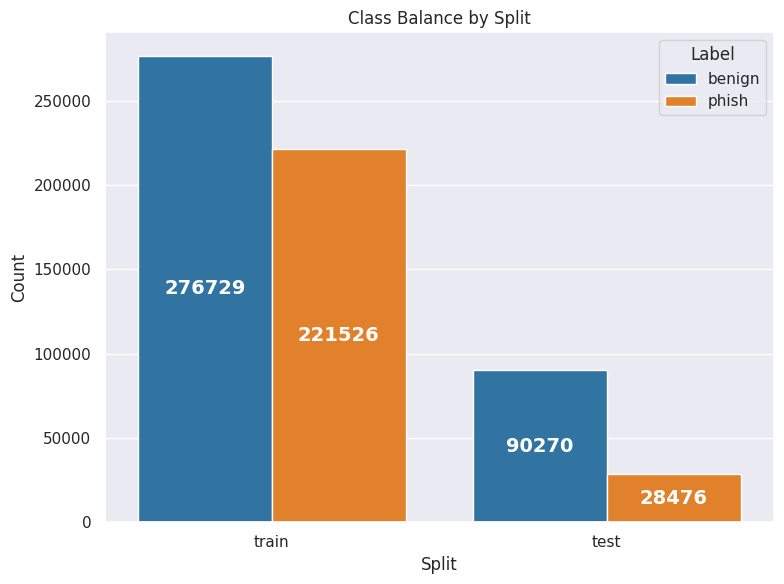

In [5]:
tab, fig = gu.class_balance(combined)

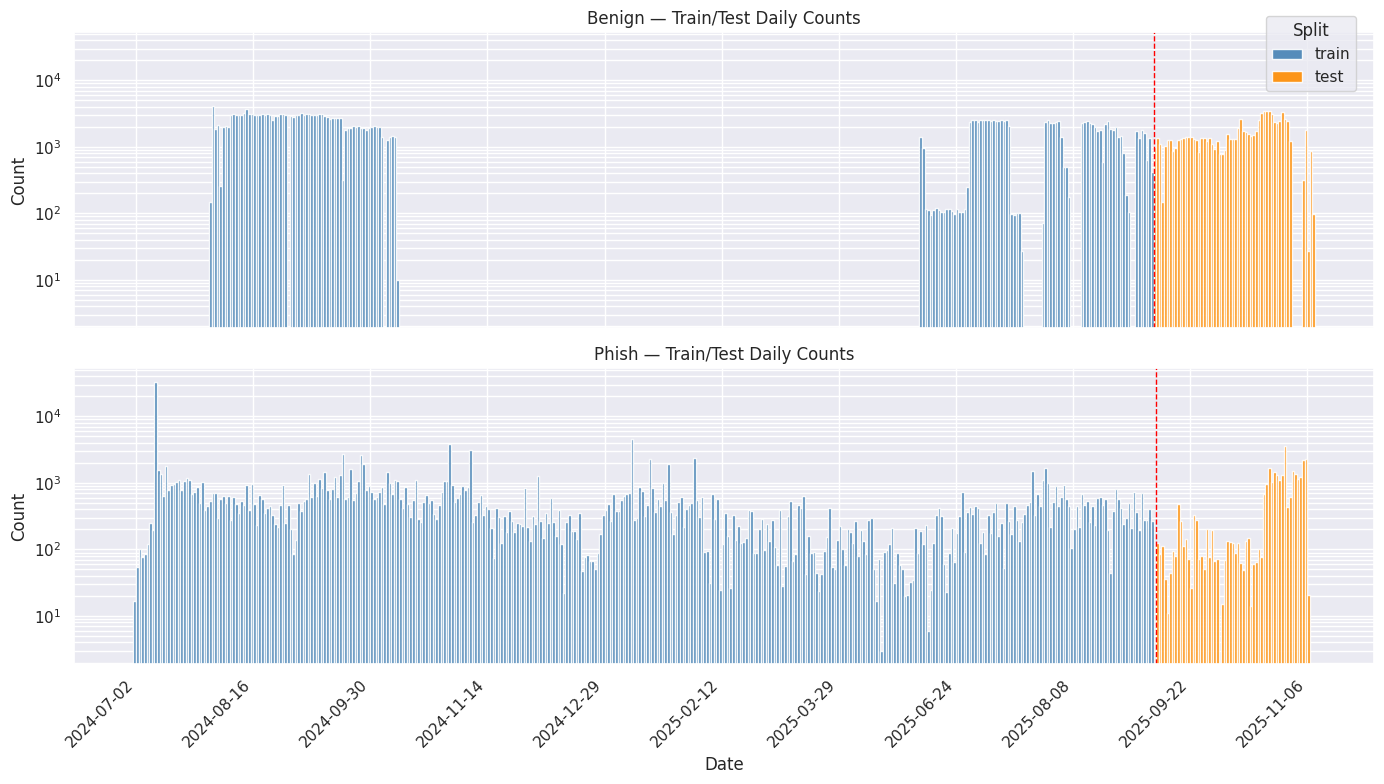

In [6]:
grouped, fig = gu.plot_daily_collection(combined)
fig.savefig("daily_collection-v1.0.1.png")

Extracting URL features from 617,001 rows...


Extracting URL features: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 618/618 [00:01<00:00, 362.62chunk/s]


Preparing plot data...
Creating plot...
Computing summary statistics...
shape: (8, 8)
┌────────┬───────────────┬─────┬──────┬──────┬──────┬───────┬────────┐
│ label  ┆ feature       ┆ min ┆ p25  ┆ p50  ┆ p75  ┆ max   ┆ count  │
│ ---    ┆ ---           ┆ --- ┆ ---  ┆ ---  ┆ ---  ┆ ---   ┆ ---    │
│ str    ┆ str           ┆ i64 ┆ f64  ┆ f64  ┆ f64  ┆ i64   ┆ i64    │
╞════════╪═══════════════╪═════╪══════╪══════╪══════╪═══════╪════════╡
│ benign ┆ url_len       ┆ 5   ┆ 42.0 ┆ 55.0 ┆ 74.0 ┆ 1414  ┆ 366999 │
│ benign ┆ domain_len    ┆ 4   ┆ 10.0 ┆ 13.0 ┆ 16.0 ┆ 46    ┆ 366999 │
│ benign ┆ subdomain_len ┆ 0   ┆ 3.0  ┆ 3.0  ┆ 3.0  ┆ 77    ┆ 366999 │
│ benign ┆ path_len      ┆ 0   ┆ 17.0 ┆ 30.0 ┆ 48.0 ┆ 1414  ┆ 366999 │
│ phish  ┆ url_len       ┆ 12  ┆ 31.0 ┆ 39.0 ┆ 57.0 ┆ 25523 ┆ 250001 │
│ phish  ┆ domain_len    ┆ 4   ┆ 10.0 ┆ 10.0 ┆ 15.0 ┆ 64    ┆ 250001 │
│ phish  ┆ subdomain_len ┆ 0   ┆ 3.0  ┆ 8.0  ┆ 17.0 ┆ 92    ┆ 250001 │
│ phish  ┆ path_len      ┆ 0   ┆ 1.0  ┆ 3.0  ┆ 15.0 ┆ 3212  ┆ 

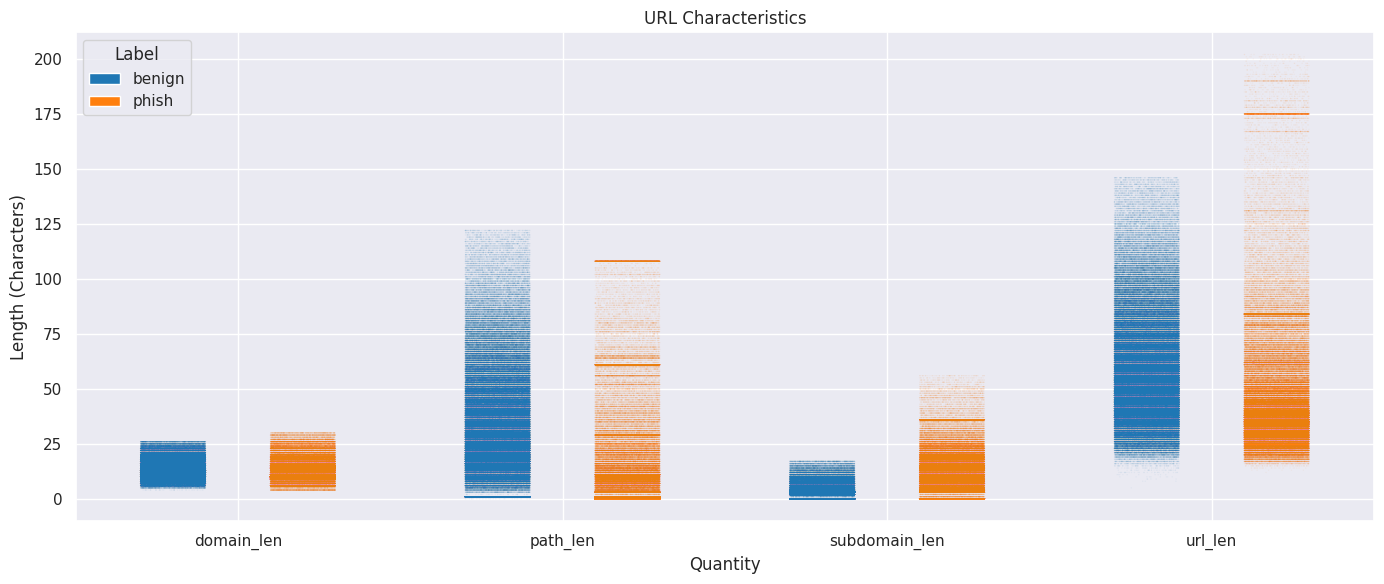

In [7]:
url_summary_stats, fig = gu.plot_url_characteristics(combined)
fig.savefig("url_characteristics-v1.0.1.png")
print(url_summary_stats)

Extracting HTML features from 617,001 rows (large dataset, using 80 workers)...


Extracting HTML features: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 302/302 [20:01<00:00,  3.98s/it]


Preparing plot data...
Creating plot...
Computing summary statistics...
shape: (8, 8)
┌────────┬────────────────┬─────┬─────────┬──────────┬──────────┬──────────┬────────┐
│ label  ┆ feature        ┆ min ┆ p25     ┆ p50      ┆ p75      ┆ max      ┆ count  │
│ ---    ┆ ---            ┆ --- ┆ ---     ┆ ---      ┆ ---      ┆ ---      ┆ ---    │
│ str    ┆ str            ┆ i64 ┆ f64     ┆ f64      ┆ f64      ┆ i64      ┆ i64    │
╞════════╪════════════════╪═════╪═════════╪══════════╪══════════╪══════════╪════════╡
│ benign ┆ total_html_len ┆ 23  ┆ 93868.0 ┆ 253504.0 ┆ 548372.0 ┆ 45877378 ┆ 366995 │
│ benign ┆ head_len_sum   ┆ 0   ┆ 11493.0 ┆ 50156.0  ┆ 151658.0 ┆ 32183109 ┆ 366995 │
│ benign ┆ img_len_sum    ┆ 0   ┆ 1004.0  ┆ 4268.0   ┆ 13056.0  ┆ 44236577 ┆ 366995 │
│ benign ┆ script_len_sum ┆ 0   ┆ 8654.0  ┆ 29181.0  ┆ 115280.0 ┆ 21785672 ┆ 366995 │
│ phish  ┆ total_html_len ┆ 28  ┆ 7817.0  ┆ 38429.0  ┆ 135613.0 ┆ 76259693 ┆ 250002 │
│ phish  ┆ head_len_sum   ┆ 0   ┆ 1303.0  ┆ 5799.0   ┆

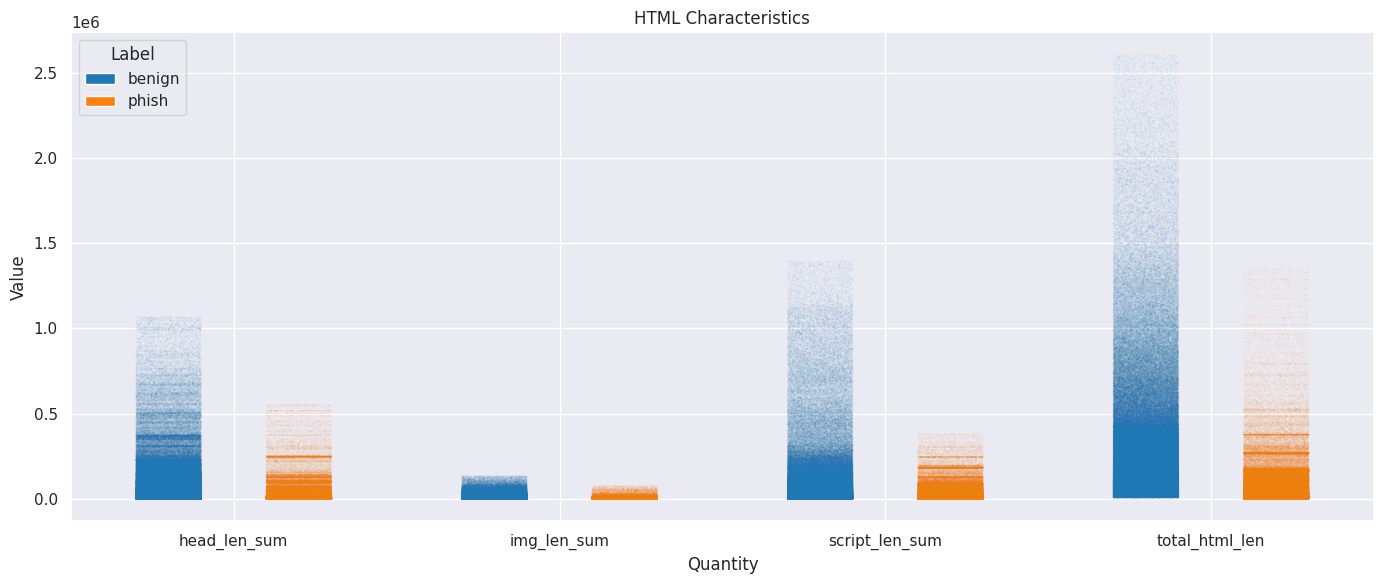

In [8]:
html_summary_stats, fig = gu.plot_html_characteristics(combined)
fig.savefig("html_characteristics-v1.0.1.png")
print(html_summary_stats)

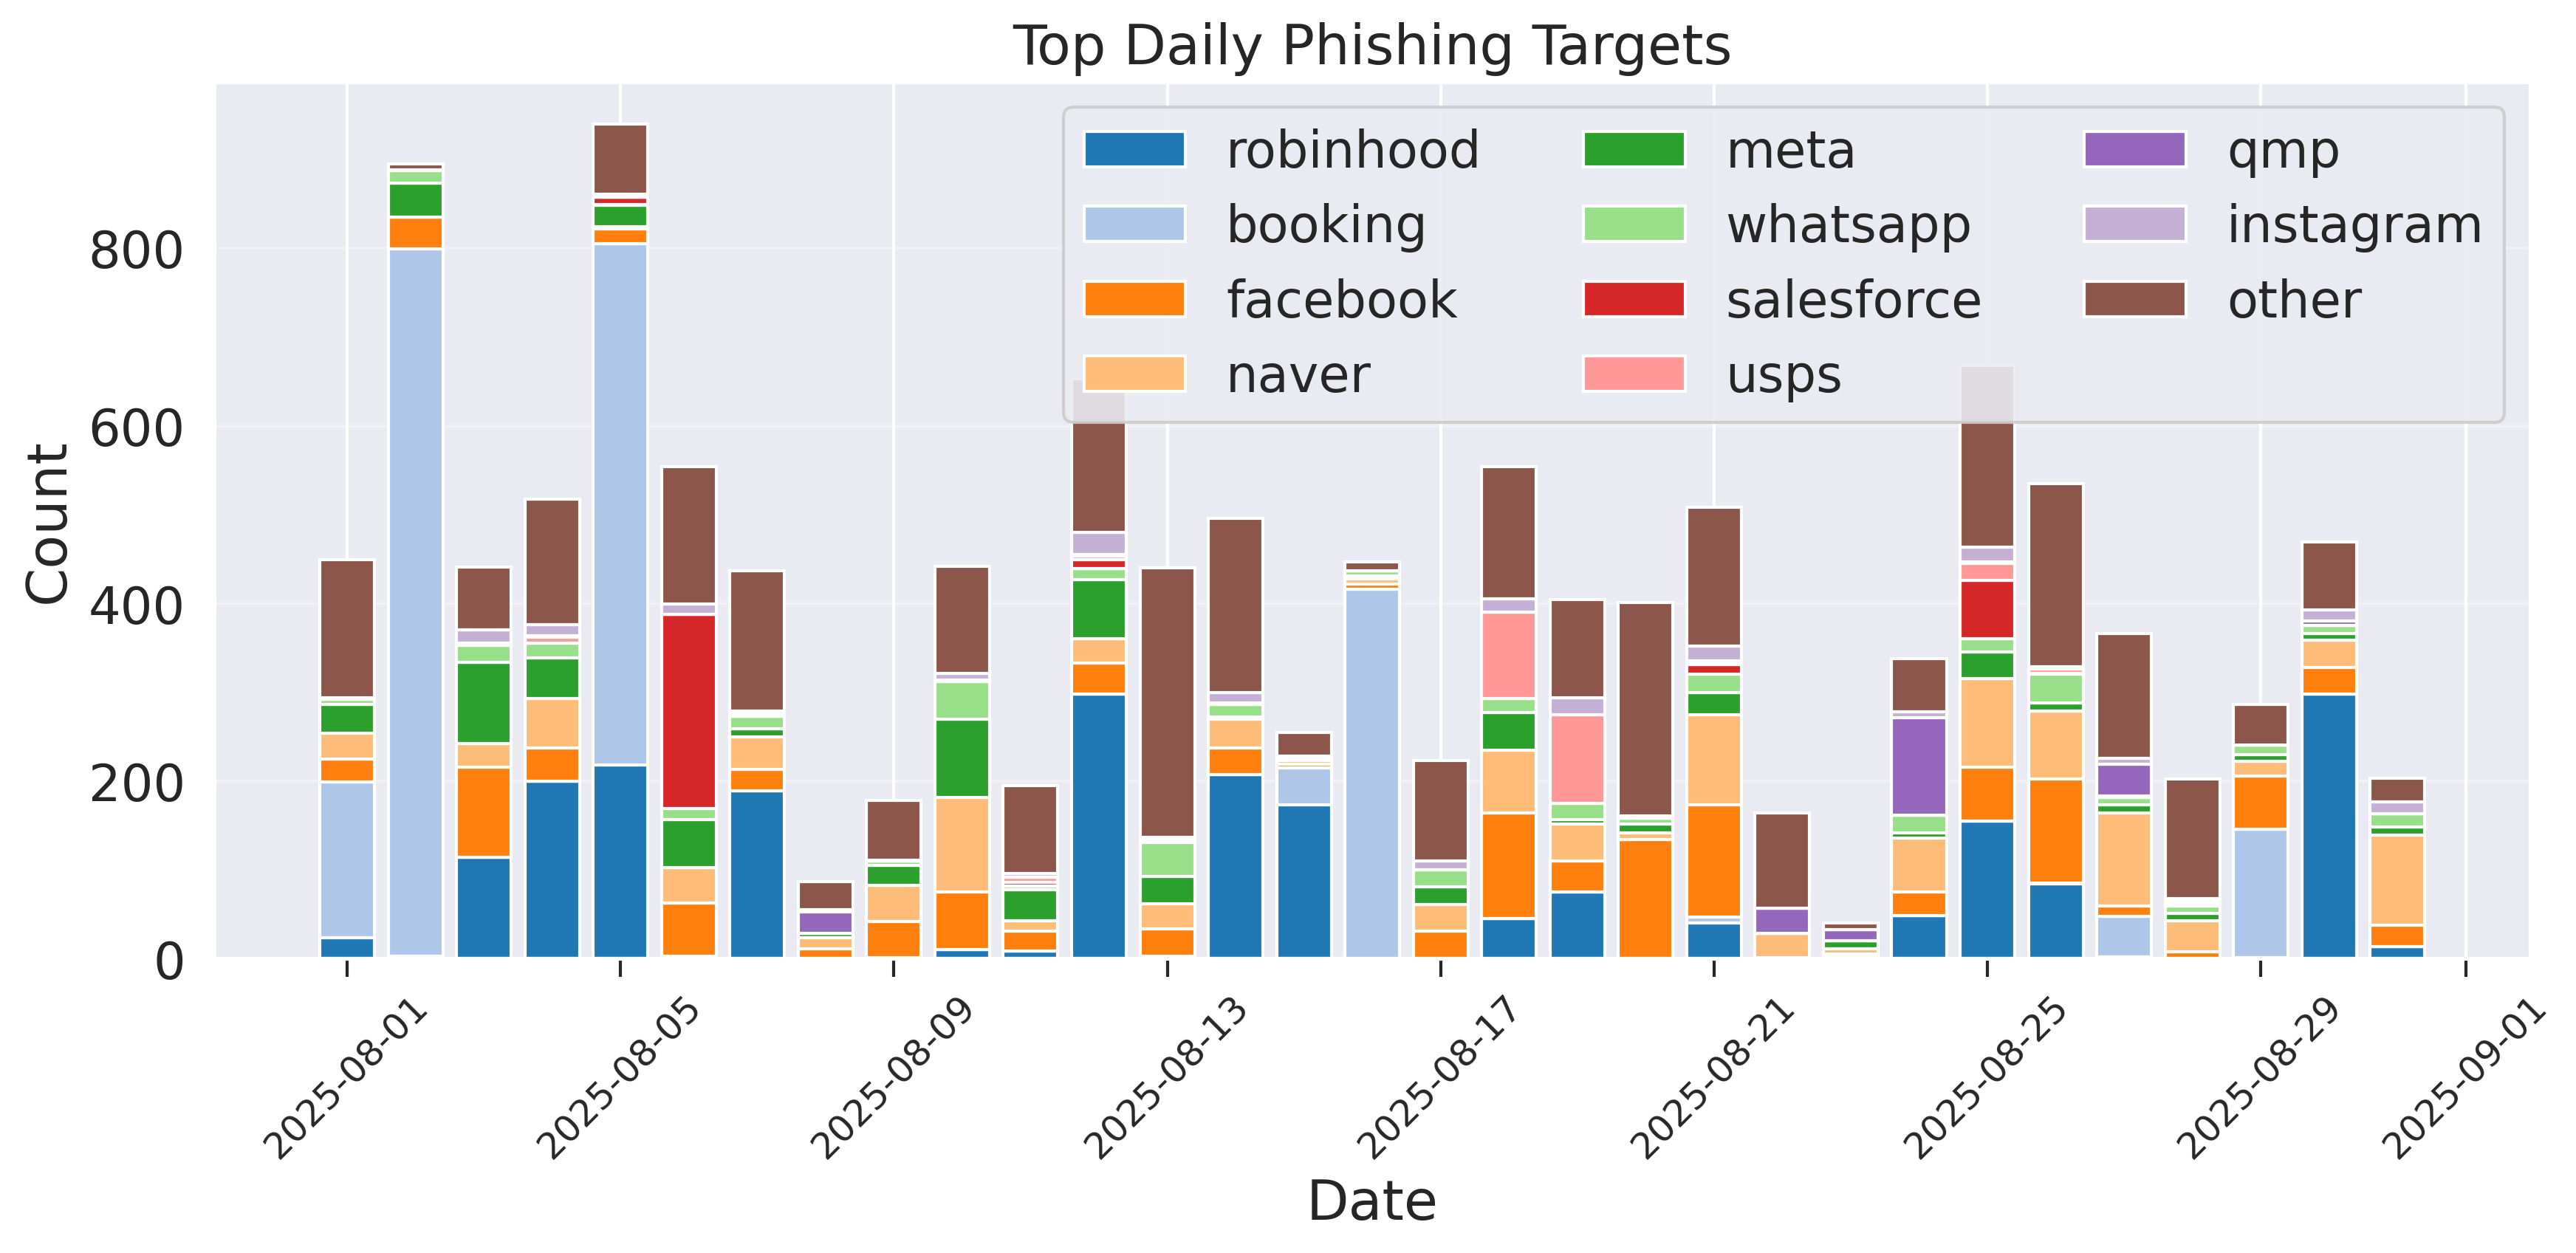

In [20]:
snapshot_df = combined.filter(
    (pl.col("label") == "phish") &
    (pl.col("date") >= pl.lit('2025-08-01').str.to_date()) &
    (pl.col("date") <= pl.lit('2025-08-31').str.to_date())
)

table, fig = gu.plot_daily_targets(snapshot_df, n=10)
fig.savefig("daily_targets-v1.0.1.png")

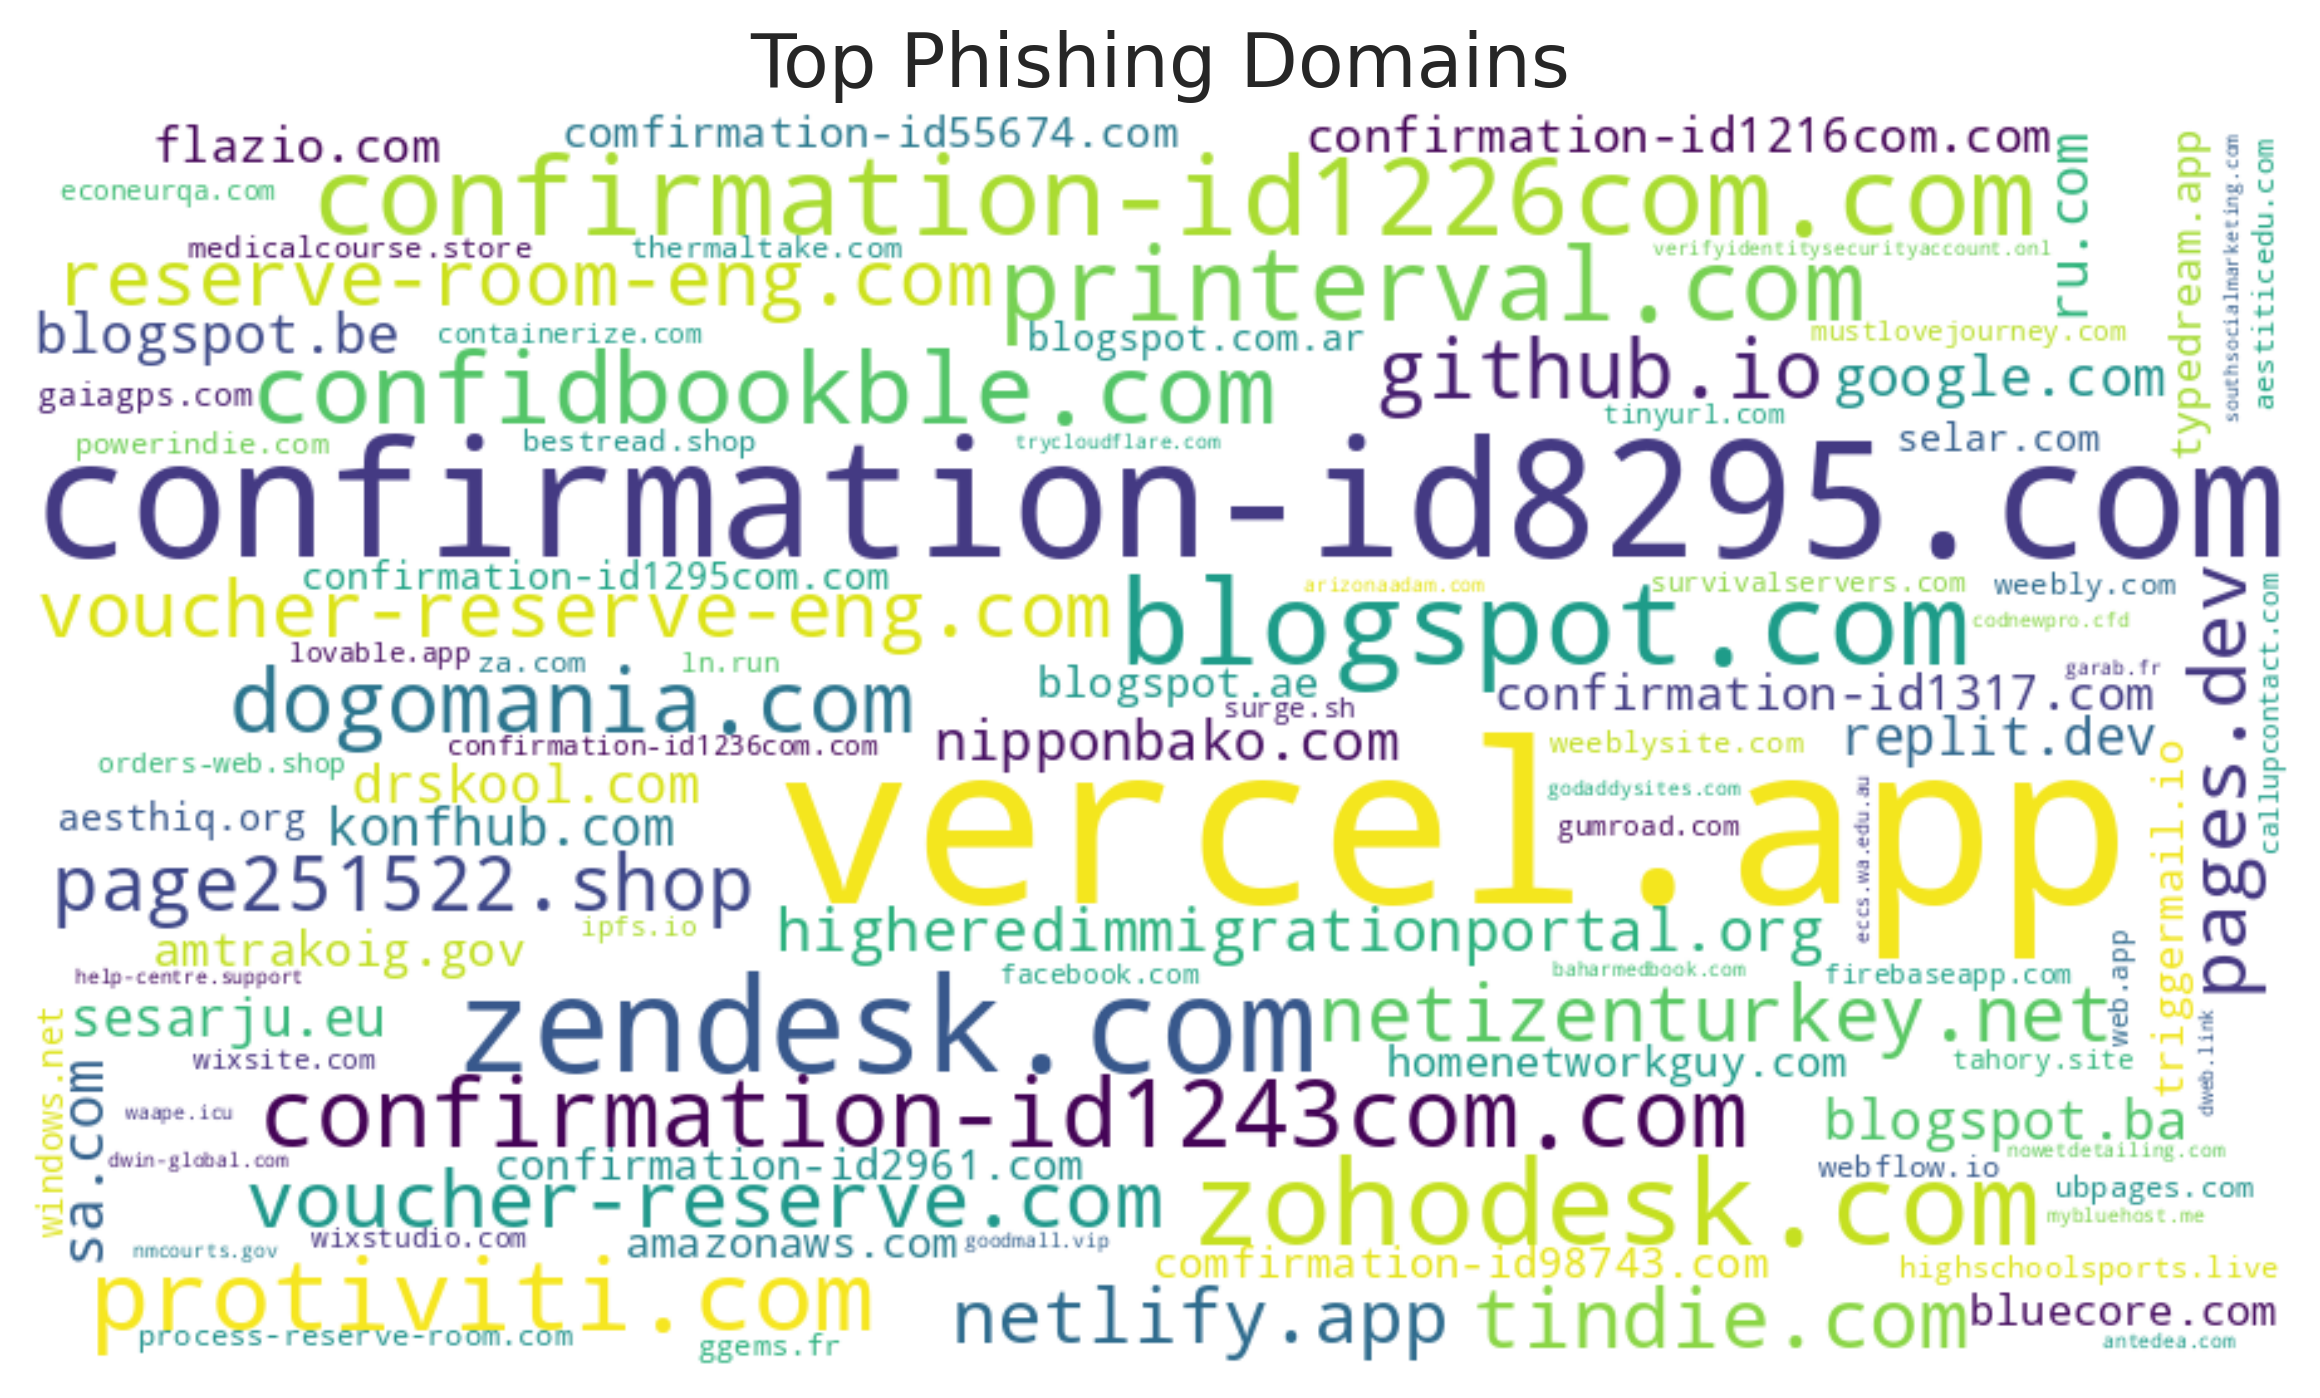

In [35]:
table, fig = gu.plot_domain_wordcloud(snapshot_df)
fig.savefig("domain_wordcloud-v1.0.1.png")

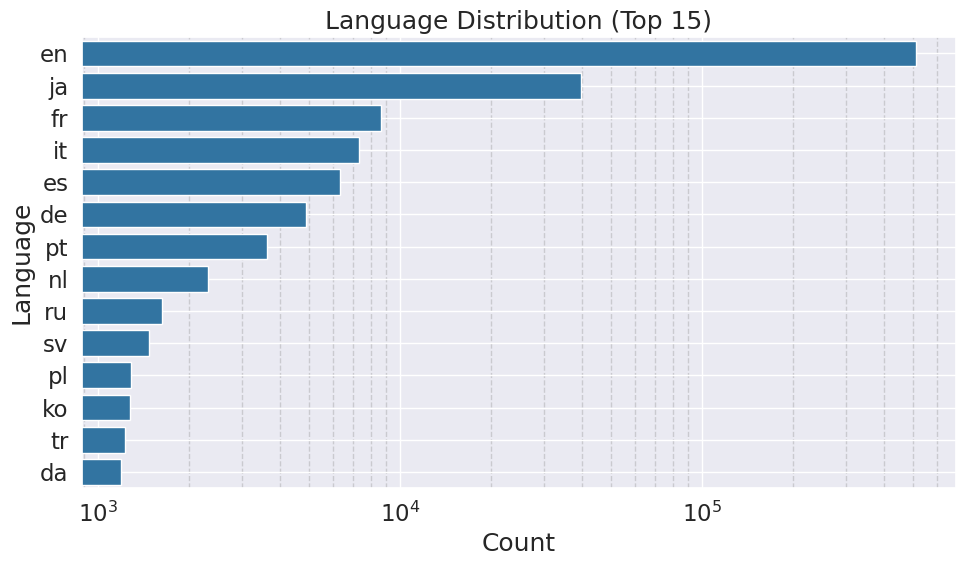

In [18]:
table, fig = gu.plot_topk_languages(combined, k=15, by_label=False)
fig.savefig("top_languages-v1.0.1.png")

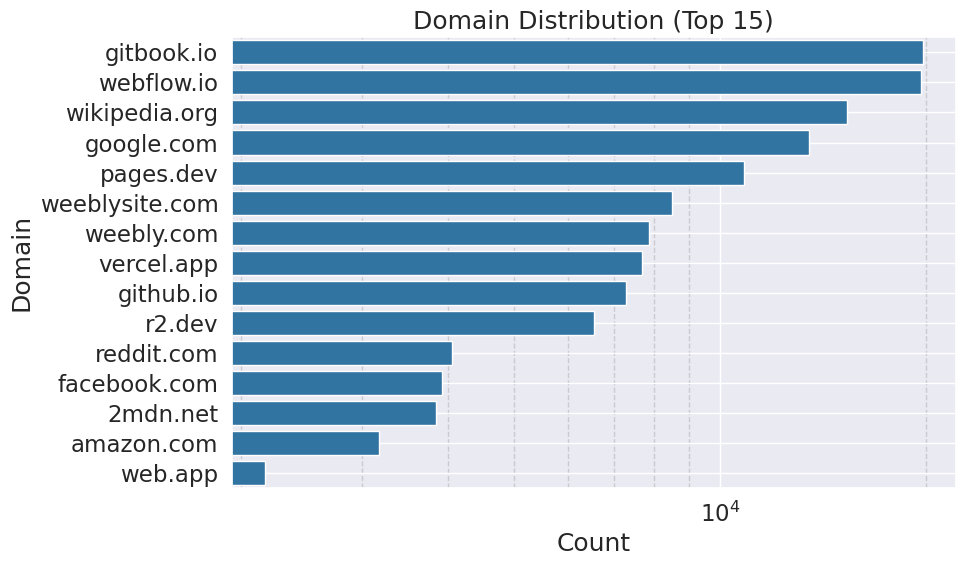

In [17]:
table, fig = gu.plot_topk_domains(combined, k=15, by_label=False)
fig.savefig("top_domains-v1.0.1.png")

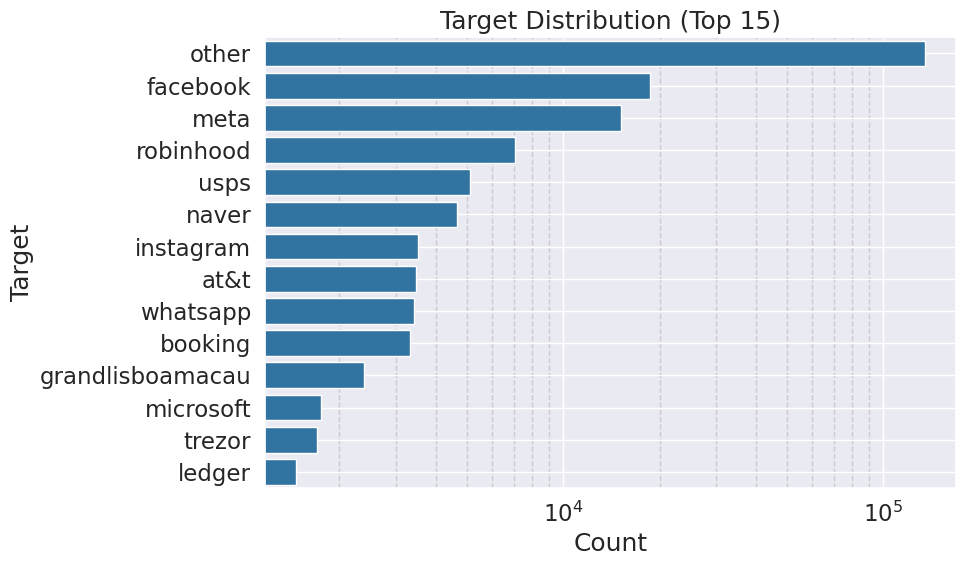

In [19]:
table, fig = gu.plot_topk_targets(combined, k=15, by_label=False)
fig.savefig("top_targets-v1.0.1.png")